Setting up gluonts and lagllama environment

In [1]:
"""
For installing gluonts and lagllama dependency
"""
# !pip uninstall numpy # Downgrade numpy to 1.23
# !pip3 install mxnet-mkl==1.6.0 numpy==1.23.1
# !pip install gluonts==0.14.2

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.25.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.25.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
ERROR: pip's dependency resolver does not currently take into account 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.9 MB/s eta 0:00:00


In [1]:
"""
Cloning lagllama repository
"""
!git clone https://github.com/time-series-foundation-models/lag-llama/

Cloning into 'lag-llama'...
remote: Enumerating objects: 315, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 315 (delta 109), reused 104 (delta 83), pack-reused 164
Receiving objects: 100% (315/315), 227.70 KiB | 1.21 MiB/s, done.
Resolving deltas: 100% (151/151), done.


In [2]:
cd /content/lag-llama

/content/lag-llama


In [3]:
"""
Installing lagllama dependencies
"""
!pip install -r requirements.txt --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 69.9 MB/s eta 0:00:00
ERROR: pip's dependency re

In [4]:
"""
Downloading lagllama model
"""
!huggingface-cli download time-series-foundation-models/Lag-Llama lag-llama.ckpt --local-dir /content/lag-llama

lag-llama.ckpt: 100% 29.5M/29.5M [00:00<00:00, 63.7MB/s]
Download complete. Moving file to /content/lag-llama/lag-llama.ckpt
/content/lag-llama/lag-llama.ckpt


Importing Libraries

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Precosessing the data

In [10]:
""""
Loading and preprocessing the data
"""

data = pd.read_csv('/content/xnas-itch-20230703.tbbo.csv')

# Preprocessing to create necessary columns
data['price']=data['price']/1e9
data['bid_px_00']=data['bid_px_00']/1e9
data['ask_px_00']=data['ask_px_00']/1e9

data['Close'] = data['price']
data['Volume'] = data['size']
data['High'] = data[['bid_px_00', 'ask_px_00']].max(axis=1)
data['Low'] = data[['bid_px_00', 'ask_px_00']].min(axis=1)
data['Open'] = data['Close'].shift(1).fillna(data['Close'])

data['ts_recv']= pd.to_datetime(data['ts_recv'], unit='ns')

In [11]:
df= data[["ts_recv", "price", "Close", "Volume", "High", "Low", ]]
df.rename(columns={'ts_recv': 'timestamp'}, inplace=True)
df.set_index("timestamp", inplace=True)

In [71]:
resampled_df = df.resample('S').mean() #resampling data from nanosecond to second
resampled_df.fillna(method='ffill', inplace=True) #filling Nan values

resampled_df['target'] = resampled_df['Close'].shift(-60) #creating target column by shifting closing price by 60 seconds
resampled_df.dropna(inplace=True)

# for column in resampled_df.columns:
#   resampled_df[column] = (resampled_df[column] - resampled_df[column].mean()) / resampled_df[column].std()

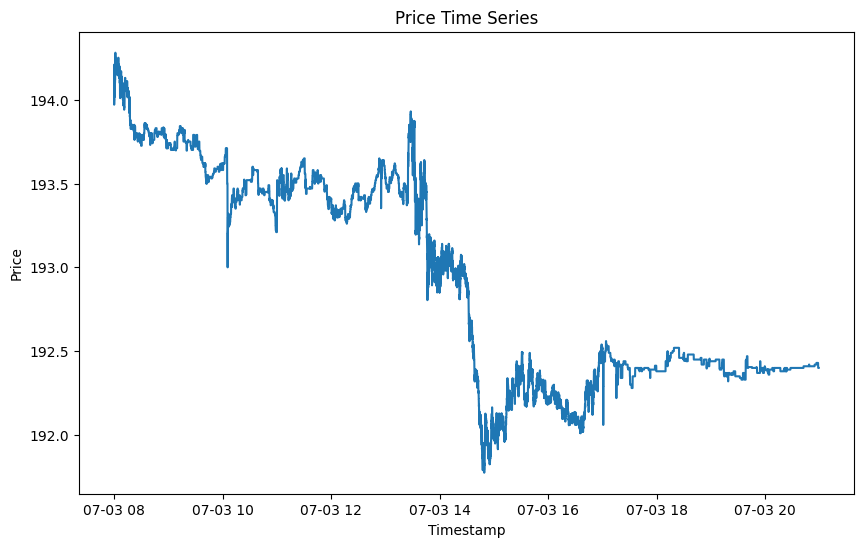

In [72]:
plt.figure(figsize=(10, 6))
sns.lineplot(resampled_df["price"])
# sns.lineplot(resampled_df["target"])
plt.title("Price Time Series")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.show()


In [73]:
"""
Splitting the data into train and test
"""
print("The time series has", resampled_df.shape[0], "data points")
len_train = int(resampled_df.shape[0] * 0.85)
train_data = resampled_df[0:len_train]
test_data = resampled_df[len_train:]
[train_data.shape, test_data.shape]


The time series has 46739 data points


[(39728, 6), (7011, 6)]

In [74]:
"""
Creating dataset for gluonts
"""
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

def to_deepar_format(dataframe, freq):
    start_index = dataframe.index.min()
    data = [{
                FieldName.START:  start_index,
                FieldName.TARGET:  dataframe["target"].values,
            }
           ]
    return ListDataset(data, freq=freq)
train_data_lds = to_deepar_format(train_data, 'S')
test_data_lds = to_deepar_format(test_data, 'S')


Using lagllama

In [75]:
from lag_llama.gluon.estimator import LagLlamaEstimator
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from tqdm  import tqdm
import torch

In [76]:
"""
Creating a function to get predictions
"""
def get_lag_llama_predictions(dataset, prediction_length, context_length=32, num_samples=20, device="cuda", batch_size=64, nonnegative_pred_samples=True):
    ckpt = torch.load("lag-llama.ckpt", map_location=device)
    estimator_args = ckpt["hyper_parameters"]["model_kwargs"]

    estimator = LagLlamaEstimator(
        ckpt_path="lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length,

        # estimator args
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        scaling=estimator_args["scaling"],
        time_feat=estimator_args["time_feat"],

        nonnegative_pred_samples=nonnegative_pred_samples,

        # linear positional encoding scaling
        rope_scaling={
            "type": "linear",
            "factor": max(1.0, (context_length + prediction_length) / estimator_args["context_length"]),
        },

        batch_size=batch_size,
        num_parallel_samples=num_samples,
    )

    lightning_module = estimator.create_lightning_module()
    transformation = estimator.create_transformation()
    predictor = estimator.create_predictor(transformation, lightning_module)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset,
        predictor=predictor,
        num_samples=num_samples
    )
    forecasts = list(tqdm(forecast_it, total=len(dataset), desc="Forecasting batches"))
    tss = list(tqdm(ts_it, total=len(dataset), desc="Ground truth"))

    return forecasts, tss

Zero shot

In [77]:
"""
Parameters for zero shot
"""
prediction_length = 600 #Precting price for last 600 timestep
context_length = prediction_length*3  #Length of input sequence
num_samples = 30  #number of samples for confidence interval prediction
device = "cuda"

In [78]:
forecasts, tss = get_lag_llama_predictions(
    test_data_lds,
    prediction_length=prediction_length,
    num_samples=num_samples,
    context_length=context_length,
    device=device
)

Ground truth: 100%|██████████| 1/1 [00:00<00:00, 1239.45it/s]


In [79]:
pred=forecasts[0]
ground_truth=tss[0]

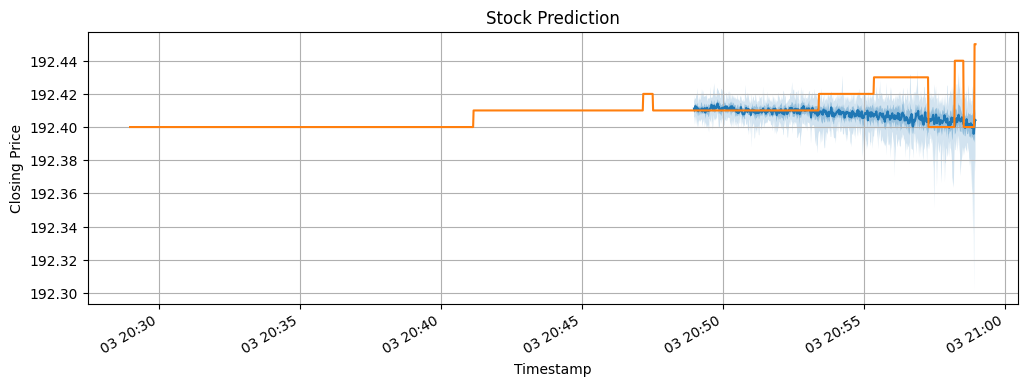

In [80]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
pred.plot(ax = ax1)
ground_truth[len(ground_truth)-1800:].plot(ax = ax1)
ax1.get_legend().remove()
plt.grid()
plt.title("Stock Prediction")
plt.xlabel("Timestamp")
plt.ylabel("Closing Price")
plt.show()

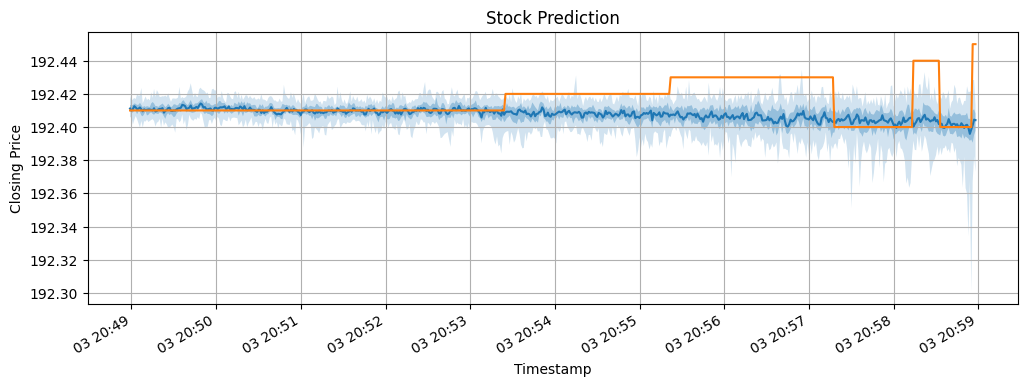

In [82]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
pred.plot(ax = ax1)
ground_truth[len(ground_truth)-600:].plot(ax = ax1)
ax1.get_legend().remove()
plt.grid()
plt.title("Stock Prediction")
plt.xlabel("Timestamp")
plt.ylabel("Closing Price")
plt.show()

In [81]:
evaluator = Evaluator()
agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))
agg_metrics

Running evaluation: 1it [00:00, 33.05it/s]


{'MSE': 0.00020137916008631387,
 'abs_error': 5.566070556640625,
 'abs_target_sum': 115449.390625,
 'abs_target_mean': 192.41565104166668,
 'seasonal_error': 0.034167050551961044,
 'MASE': 0.27151258628425157,
 'MAPE': 4.820940705637137e-05,
 'sMAPE': 4.821201165517171e-05,
 'MSIS': 4.6315263606252755,
 'num_masked_target_values': 0.0,
 'QuantileLoss[0.1]': 1.9171234130859376,
 'Coverage[0.1]': 0.0,
 'QuantileLoss[0.2]': 3.0681457519531254,
 'Coverage[0.2]': 0.006666666666666667,
 'QuantileLoss[0.3]': 3.9441253662109372,
 'Coverage[0.3]': 0.10166666666666667,
 'QuantileLoss[0.4]': 4.751190185546876,
 'Coverage[0.4]': 0.23333333333333334,
 'QuantileLoss[0.5]': 5.566070556640625,
 'Coverage[0.5]': 0.35833333333333334,
 'QuantileLoss[0.6]': 6.180438232421876,
 'Coverage[0.6]': 0.4866666666666667,
 'QuantileLoss[0.7]': 6.5518341064453125,
 'Coverage[0.7]': 0.5616666666666666,
 'QuantileLoss[0.8]': 6.5051818847656255,
 'Coverage[0.8]': 0.5733333333333334,
 'QuantileLoss[0.9]': 5.81126403808

Fine-tuning Lag-LLama

In [85]:
from lag_llama.gluon.estimator import LagLlamaEstimator
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from tqdm  import tqdm
import torch

In [86]:
prediction_length = 600
context_length = prediction_length*3
num_samples = 30
device = "cuda"

In [87]:
ckpt = torch.load("lag-llama.ckpt", map_location=device)
estimator_args = ckpt["hyper_parameters"]["model_kwargs"]

estimator = LagLlamaEstimator(
        ckpt_path="lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length,

        # distr_output="neg_bin",
        # scaling="mean",
        nonnegative_pred_samples=True,
        aug_prob=0,
        lr=5e-4,

        # estimator args
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        time_feat=estimator_args["time_feat"],

        # rope_scaling={
        #     "type": "linear",
        #     "factor": max(1.0, (context_length + prediction_length) / estimator_args["context_length"]),
        # },

        batch_size=64,
        num_parallel_samples=num_samples,
        trainer_kwargs = {"max_epochs": 20}, # <- lightning trainer arguments
    )

In [88]:
predictor = estimator.train(train_data_lds, cache_data=True, shuffle_buffer_length=1000)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name          | Type               | Params
-----------------------------------------------------
0 | model         | LagLlamaModel      | 2.4 M 
1 | augmentations | ApplyAugmentations | 0     
-----------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.797     Total estimated mod

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'train_loss' reached 4.48159 (best 4.48159), saving model to '/content/lag-llama/lightning_logs/version_1/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'train_loss' reached 4.48159 (best 4.48159), saving model to '/content/lag-llama/lightning_logs/version_1/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO: Epoch 1, global step 100: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 100: 'train_loss' was not in top 1
INFO: Epoch 2, global step 150: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 150: 'train_loss' was not in top 1
INFO: Epoch 3, global step 200: 'train_loss' reached 3.43355 (best 3.43355), saving model to '/content/lag-llama/lightning_logs/version_1/checkpoints/epoch=3-step=200.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 200: 'train_loss' reached 3.43355 (

In [92]:
forecast_it, ts_it = make_evaluation_predictions(
        dataset=test_data_lds,
        predictor=predictor,
        num_samples=num_samples
    )

In [93]:
forecasts = list(tqdm(forecast_it, total=len(test_data_lds), desc="Forecasting batches"))
tss = list(tqdm(ts_it, total=len(test_data_lds), desc="Ground truth"))

Ground truth: 100%|██████████| 1/1 [00:00<00:00, 1483.66it/s]


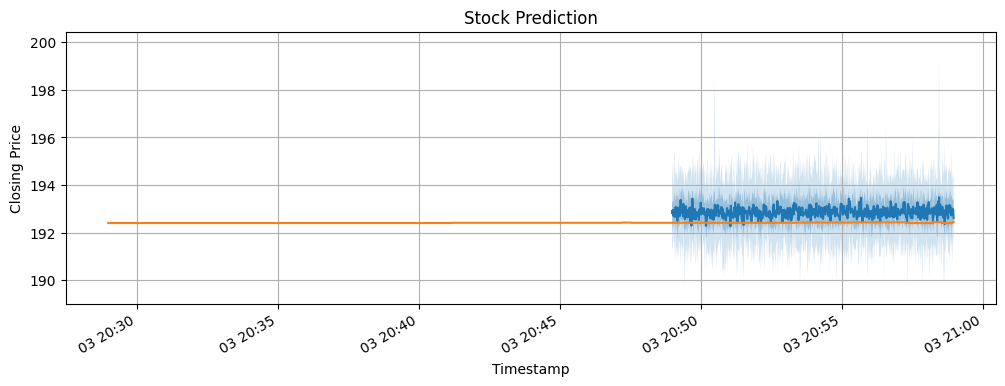

In [95]:
pred=forecasts[0]
ground_truth=tss[0]

fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
pred.plot(ax = ax1)
ground_truth[len(ground_truth)-1800:].plot(ax = ax1)
ax1.get_legend().remove()
plt.grid()
plt.title("Stock Prediction")
plt.xlabel("Timestamp")
plt.ylabel("Closing Price")
plt.show()

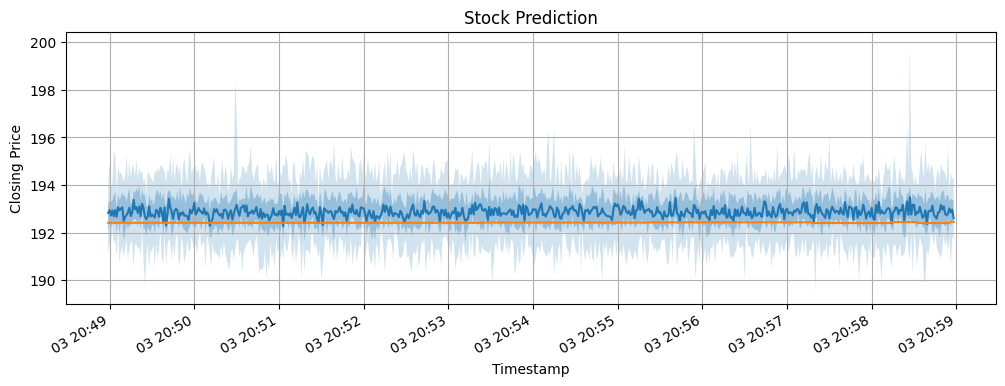

In [96]:
pred=forecasts[0]
ground_truth=tss[0]

fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
pred.plot(ax = ax1)
ground_truth[len(ground_truth)-600:].plot(ax = ax1)
ax1.get_legend().remove()
plt.grid()
plt.title("Stock Prediction")
plt.xlabel("Timestamp")
plt.ylabel("Closing Price")
plt.show()

In [97]:
evaluator = Evaluator()
agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))
agg_metrics

Running evaluation: 1it [00:00, 39.20it/s]


{'MSE': 0.26419148763020833,
 'abs_error': 263.683349609375,
 'abs_target_sum': 115449.390625,
 'abs_target_mean': 192.41565104166668,
 'seasonal_error': 0.034167050551961044,
 'MASE': 12.862457901673766,
 'MAPE': 0.002283974488576253,
 'sMAPE': 0.0022808710734049478,
 'MSIS': 96.63279860292913,
 'num_masked_target_values': 0.0,
 'QuantileLoss[0.1]': 78.93792114257813,
 'Coverage[0.1]': 0.01,
 'QuantileLoss[0.2]': 79.40046997070313,
 'Coverage[0.2]': 0.17666666666666667,
 'QuantileLoss[0.3]': 115.43077392578124,
 'Coverage[0.3]': 0.6066666666666667,
 'QuantileLoss[0.4]': 215.57868041992185,
 'Coverage[0.4]': 0.9216666666666666,
 'QuantileLoss[0.5]': 263.683349609375,
 'Coverage[0.5]': 0.9883333333333333,
 'QuantileLoss[0.6]': 317.6133544921875,
 'Coverage[0.6]': 1.0,
 'QuantileLoss[0.7]': 322.356234741211,
 'Coverage[0.7]': 1.0,
 'QuantileLoss[0.8]': 285.40919189453115,
 'Coverage[0.8]': 1.0,
 'QuantileLoss[0.9]': 191.99234619140623,
 'Coverage[0.9]': 1.0,
 'RMSE': 0.5139956105164794,
